In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [12]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()
# df.info()
# used excel for further eda

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# df.drop_cols
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# onehotencoding alt in pandas
df = pd.get_dummies(df, columns=['Embarked'], prefix='Emb')

In [15]:
X = df.drop('Survived', axis=1)
y = df['Survived']
print(X.shape)
print(y.value_counts())

(891, 9)
Survived
0    549
1    342
Name: count, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print(list(y_test[:20]))
print(list(preds[:20]))

[1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0]
[np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0)]


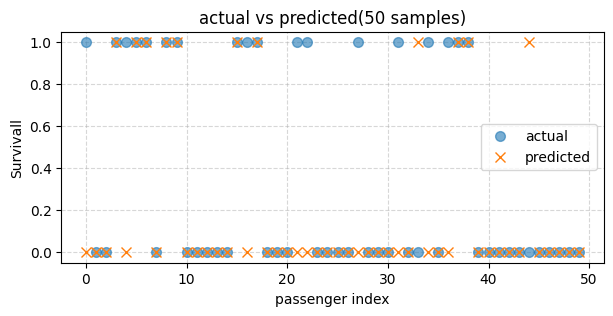

In [21]:
plt.figure(figsize=(7, 3))
plt.plot(y_test.values[:50], 'o', label='actual', markersize=7, alpha=0.6)
# plt.plot(y_test.values[:50], '1', label='actual', markersize=10, alpha=0.6)
plt.plot(preds[:50], 'x', label='predicted', markersize=7)
plt.title('actual vs predicted(50 samples)')
plt.xlabel('passenger index')
plt.ylabel('Survivall')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('titanic_prediction_comparison.png')

In [ ]:
# end